# Logistic Regression.


## Import required packages.

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from mord import LogisticIT

import statsmodels.api as sm

from dmba import classificationSummary, gainsChart, liftChart

%matplotlib inline
import matplotlib.pylab as plt


# For Linear Regression 
from dmba import backward_elimination, forward_selection, stepwise_selection
from sklearn.linear_model import LinearRegression
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import regressionSummary, exhaustive_search

# Show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

import seaborn as sns




## Data exploration, cleaning, and preprocessing.

In [3]:
# Create data frame for UniversalBank data set.
hospital_df = pd.read_csv('hospital_readmissions.csv')

# Display the first 10 records of bank_df data frame.
print(hospital_df.head(10))

# Identify variable types.
hospital_df.dtypes


       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   
5  [40-50)                 2                51             0             10   
6  [50-60)                 4                44             2             21   
7  [60-70)                 1                19             6             16   
8  [80-90)                 4                67             3             13   
9  [70-80)                 8                37             1             18   

   n_outpatient  n_inpatient  n_emergency       medical_specialty  \
0             2            0            0                 Mis

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

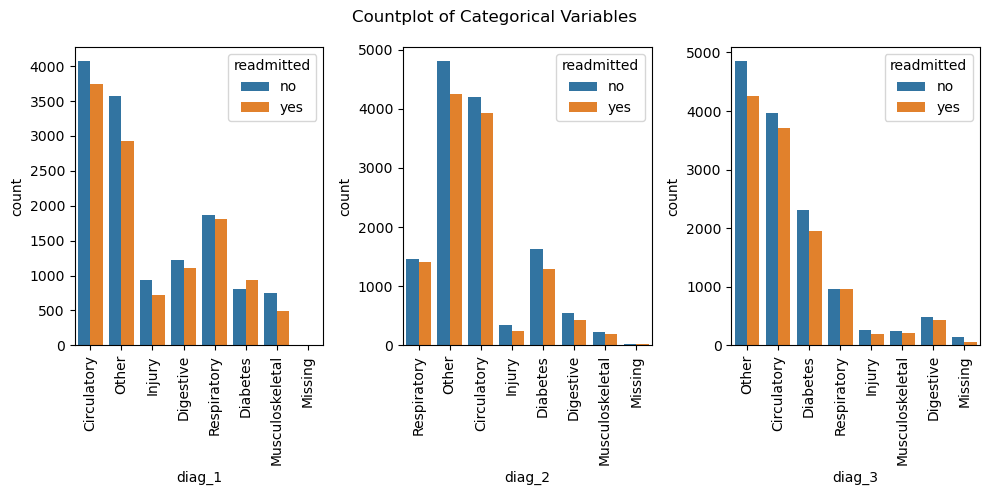

In [4]:
# list of categorical data to plot
cat_vars = ['diag_1', 'diag_2', 'diag_3']

# creating figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
axs = axs.flatten()

fig.suptitle("Countplot of Categorical Variables")

for i,var in enumerate(cat_vars):
    sns.countplot(x=var, hue='readmitted', data=hospital_df, ax=axs[i])
    axs[i].set_xticks(range(len(axs[i].get_xticklabels())))  # Set tick positions
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

fig.tight_layout()    
plt.show()

In [5]:
# Convert object variables into dummy variables. 
# Use drop_first=True to drop the first dummy variable. 
hospital_df = pd.get_dummies(hospital_df, prefix_sep='_', drop_first=True).astype(int)

#Display updated data types
hospital_df.dtypes


time_in_hospital                            int32
n_lab_procedures                            int32
n_procedures                                int32
n_medications                               int32
n_outpatient                                int32
n_inpatient                                 int32
n_emergency                                 int32
age_[50-60)                                 int32
age_[60-70)                                 int32
age_[70-80)                                 int32
age_[80-90)                                 int32
age_[90-100)                                int32
medical_specialty_Emergency/Trauma          int32
medical_specialty_Family/GeneralPractice    int32
medical_specialty_InternalMedicine          int32
medical_specialty_Missing                   int32
medical_specialty_Other                     int32
medical_specialty_Surgery                   int32
diag_1_Diabetes                             int32
diag_1_Digestive                            int32


In [6]:
hospital_df.head(10)

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Missing,medical_specialty_Other,medical_specialty_Surgery,diag_1_Diabetes,diag_1_Digestive,diag_1_Injury,diag_1_Missing,diag_1_Musculoskeletal,diag_1_Other,diag_1_Respiratory,diag_2_Diabetes,diag_2_Digestive,diag_2_Injury,diag_2_Missing,diag_2_Musculoskeletal,diag_2_Other,diag_2_Respiratory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,glucose_test_no,glucose_test_normal,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes,readmitted_yes
0,8,72,1,18,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0
1,3,34,2,13,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
2,5,45,0,18,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1
3,2,36,0,12,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,1
4,1,42,0,7,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0
5,2,51,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
6,4,44,2,21,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0
7,1,19,6,16,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1
8,4,67,3,13,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
9,8,37,1,18,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0


In [7]:
### BATCH 1 - A ###


########################################
# Date : May 2, 2025                   #
# Description: Convert dummy variables #
########################################

# Convert new dummy variables from Boolean (True, False) to Integer (1,0) values 
# and display them
# Convert dummy variable values into ingteger type (1,0)


hospital_df= pd.get_dummies(hospital_df, drop_first=False).astype(int)
print(hospital_df.dtypes)
print(hospital_df.shape)
#readmitted_yes                               

time_in_hospital                            int32
n_lab_procedures                            int32
n_procedures                                int32
n_medications                               int32
n_outpatient                                int32
n_inpatient                                 int32
n_emergency                                 int32
age_[50-60)                                 int32
age_[60-70)                                 int32
age_[70-80)                                 int32
age_[80-90)                                 int32
age_[90-100)                                int32
medical_specialty_Emergency/Trauma          int32
medical_specialty_Family/GeneralPractice    int32
medical_specialty_InternalMedicine          int32
medical_specialty_Missing                   int32
medical_specialty_Other                     int32
medical_specialty_Surgery                   int32
diag_1_Diabetes                             int32
diag_1_Digestive                            int32


In [8]:
### BATCH 1 - B ###

########################################
# Date : May 2, 2025                   #
# Description: Train Test Split        #
########################################

#dropping records because dataset is too big
#hospital_df = hospital_df.drop(hospital_df.sample(frac=0.75, random_state=42).index)
print(hospital_df.shape)

# Randomly sample 5000 rows from the dataset
#hospital_df = hospital_df.sample(n=100, random_state=42)
#print(hospital_df.shape)


# Create predictors X and outcome y variables.
X = hospital_df.drop(columns=['readmitted_yes'])
y = hospital_df['readmitted_yes']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y,
                            test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic
# regression for training partition.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(solver='liblinear', C=1e42)
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)},
                    index=X.columns).transpose())



(25000, 46)
Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -0.663
Coefficients for Predictors
        time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
Coeff:             0.017             0.002        -0.028          0.001   

        n_outpatient  n_inpatient  n_emergency  age_[50-60)  age_[60-70)  \
Coeff:         0.119        0.391         0.25       -0.025        0.111   

        age_[70-80)  age_[80-90)  age_[90-100)  \
Coeff:        0.152        0.225        -0.106   

        medical_specialty_Emergency/Trauma  \
Coeff:                              -0.003   

        medical_specialty_Family/GeneralPractice  \
Coeff:                                    -0.006   

        medical_specialty_InternalMedicine  medical_specialty_Missing  \
Coeff:                              -0.196                      0.021   

        medical_specialty_Other  medical_specialty_Surgery  diag_1_Diabetes  \
Coeff:                    -0.17                  

In [9]:
### BATCH 1 - C ###

########################################
# Date : May 3, 2025                   #
# Description: Make Predictions        #
########################################

# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
       Actual  Classification    p(0)    p(1)
21492       0               0  0.6487  0.3513
9488        0               0  0.6551  0.3449
16933       0               0  0.6117  0.3883
12604       1               0  0.6269  0.3731
8222        0               0  0.5476  0.4524
9110        1               1  0.0063  0.9937
21196       1               1  0.4976  0.5024
17193       1               0  0.5673  0.4327
23846       1               1  0.2786  0.7214
10415       0               0  0.5606  0.4394
9018        0               1  0.4652  0.5348
24056       0               0  0.5196  0.4804
19992       0               0  0.5554  0.4446
11464       0               0  0.6402  0.3598
10641       1               0  0.6017  0.3983
7192        0               0  0.6156  0.3844
2164        0               0  0.6636  0.3364
2277        0               0  0.5558  0.4442
6038        0               0  0.6985  0.3015
15100       0               0  0.5593  0

In [10]:

### BATCH 1 - D ###

########################################
# Author: Eric S. Viacrusis            #
# Date : May 2, 2025                   #
# Description: Confusion Matrices      #
########################################

# Confusion matrices for multiple predictors logistic model.

# Identify and display confusion matrix for training partition.
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition.
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.6123)

       Prediction
Actual    0    1
     0 6056 1783
     1 4033 3128

Validation Partition
Confusion Matrix (Accuracy 0.6157)

       Prediction
Actual    0    1
     0 4125 1282
     1 2561 2032


In [11]:
### BATCH 2 ###

# Create data frame for UniversalBank data set.
b2_hospital_df = pd.read_csv('hospital_readmissions.csv')

# Display the first 10 records of bank_df data frame.
print(b2_hospital_df.head(10))



b2_hospital_df = b2_hospital_df.drop(columns=['age'])

# Identify variable types.
b2_hospital_df.dtypes


       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   
5  [40-50)                 2                51             0             10   
6  [50-60)                 4                44             2             21   
7  [60-70)                 1                19             6             16   
8  [80-90)                 4                67             3             13   
9  [70-80)                 8                37             1             18   

   n_outpatient  n_inpatient  n_emergency       medical_specialty  \
0             2            0            0                 Mis

time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

## Backward Elimination Algorithm


In [12]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: time_in_hospital, n_lab_procedures, n_procedures, n_medications, n_outpatient, n_inpatient, n_emergency, age_[50-60), age_[60-70), age_[70-80), age_[80-90), age_[90-100), medical_specialty_Emergency/Trauma, medical_specialty_Family/GeneralPractice, medical_specialty_InternalMedicine, medical_specialty_Missing, medical_specialty_Other, medical_specialty_Surgery, diag_1_Diabetes, diag_1_Digestive, diag_1_Injury, diag_1_Missing, diag_1_Musculoskeletal, diag_1_Other, diag_1_Respiratory, diag_2_Diabetes, diag_2_Digestive, diag_2_Injury, diag_2_Missing, diag_2_Musculoskeletal, diag_2_Other, diag_2_Respiratory, diag_3_Diabetes, diag_3_Digestive, diag_3_Injury, diag_3_Missing, diag_3_Musculoskeletal, diag_3_Other, diag_3_Respiratory, glucose_test_no, glucose_test_normal, A1Ctest_no, A1Ctest_normal, change_yes, diabetes_med_yes
Start: score=20799.58
Step: score=20797.58, remove medical_specialty_Family/GeneralPractice
Step: score=20795.60, remove diag_3_Diabetes
Step: score=20793.63,

In [13]:
### BATCH 3 - A.1 ###

# Create data frame for UniversalBank data set.
b3_hospital_df = pd.read_csv('hospital_readmissions.csv')

# Display the first 10 records of bank_df data frame.
print(b3_hospital_df.head(10))

# Identify variable types.
b2_hospital_df.dtypes

       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   
5  [40-50)                 2                51             0             10   
6  [50-60)                 4                44             2             21   
7  [60-70)                 1                19             6             16   
8  [80-90)                 4                67             3             13   
9  [70-80)                 8                37             1             18   

   n_outpatient  n_inpatient  n_emergency       medical_specialty  \
0             2            0            0                 Mis

time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [14]:
### BATCH 3 - A.2 ###

########################################
# Date : May 2, 2025                   #
# Description: Convert dummy variables #
########################################

# Convert new dummy variables from Boolean (True, False) to Integer (1,0) values 
# and display them
# Convert dummy variable values into ingteger type (1,0)


b3_hospital_df= pd.get_dummies(b3_hospital_df, drop_first=False).astype(int)
print(b3_hospital_df.dtypes)
print(b3_hospital_df.shape)
#readmitted_yes        

time_in_hospital                            int32
n_lab_procedures                            int32
n_procedures                                int32
n_medications                               int32
n_outpatient                                int32
n_inpatient                                 int32
n_emergency                                 int32
age_[40-50)                                 int32
age_[50-60)                                 int32
age_[60-70)                                 int32
age_[70-80)                                 int32
age_[80-90)                                 int32
age_[90-100)                                int32
medical_specialty_Cardiology                int32
medical_specialty_Emergency/Trauma          int32
medical_specialty_Family/GeneralPractice    int32
medical_specialty_InternalMedicine          int32
medical_specialty_Missing                   int32
medical_specialty_Other                     int32
medical_specialty_Surgery                   int32


In [15]:
### BATCH 3 - B ###

########################################
# Date : May 2, 2025                   #
# Description: Train Test Split        #
########################################

#dropping records because dataset is too big
b3_hospital_df = b3_hospital_df.drop(b3_hospital_df.sample(frac=0.75, random_state=42).index)
print(b3_hospital_df.shape)


# Identify predictors and outcome of the regression model.
predictors = ['n_lab_procedures', 'n_outpatient', 'n_inpatient', 'n_emergency', 'age_[80-90)', 
              'diag_1_Digestive', 'diag_1_Injury', 'diag_1_Musculoskeletal', 'diag_1_Other', 
              'glucose_test_normal', 'A1Ctest_no', 'change_yes', 'diabetes_med_yes']

outcome = 'readmitted_yes'

# Create predictors X and outcome y variables.
b3_X = b3_hospital_df[predictors]
b3_y = b3_hospital_df[outcome]

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
b3_train_X, b3_valid_X, b3_train_y, b3_valid_y = train_test_split(b3_X, b3_y,
                            test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic
# regression for training partition.
# solver='liblinear' is used for automated selection of the best parameters.
b3_log_reg = LogisticRegression(solver='liblinear', C=1e42)
b3_log_reg.fit(b3_train_X, b3_train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(b3_log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(b3_log_reg.coef_[0], decimals=3)},
                    index=b3_X.columns).transpose())


(6250, 56)
Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -0.847
Coefficients for Predictors
        n_lab_procedures  n_outpatient  n_inpatient  n_emergency  age_[80-90)  \
Coeff:             0.004         0.185        0.413        0.132        0.157   

        diag_1_Digestive  diag_1_Injury  diag_1_Musculoskeletal  diag_1_Other  \
Coeff:             -0.18         -0.227                  -0.281         -0.25   

        glucose_test_normal  A1Ctest_no  change_yes  diabetes_med_yes  
Coeff:                -0.36       0.148      -0.135             0.356  


In [16]:
### BATCH 3 - C ###

########################################
# Date : May 3, 2025                   #
# Description: Make Predictions        #
########################################

# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
b3_log_pred = b3_log_reg.predict(b3_valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
b3_log_prob = np.round(b3_log_reg.predict_proba(b3_valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
b3_log_result = pd.DataFrame({'Actual': b3_valid_y, 
                    'Classification': b3_log_pred,
                    'p(0)': [p[0] for p in b3_log_prob],
                    'p(1)': [p[1] for p in b3_log_prob]
})

print('Classification for Validation Partition')
print(b3_log_result.head(20))

Classification for Validation Partition
       Actual  Classification    p(0)    p(1)
4758        0               0  0.5884  0.4116
11168       1               1  0.3288  0.6712
18767       0               0  0.5574  0.4426
22415       1               0  0.5852  0.4148
20022       1               1  0.4959  0.5041
18030       1               0  0.6152  0.3848
10106       1               0  0.6662  0.3338
22179       0               0  0.6858  0.3142
22146       1               0  0.5541  0.4459
15688       1               0  0.6356  0.3644
20700       0               0  0.5493  0.4507
18032       1               1  0.1857  0.8143
19255       1               1  0.4420  0.5580
12625       0               0  0.6411  0.3589
21183       0               0  0.5591  0.4409
15941       0               0  0.6135  0.3865
7243        0               1  0.3650  0.6350
19092       0               1  0.4563  0.5437
8566        0               0  0.6392  0.3608
6799        0               0  0.6204  0

In [17]:
### BATCH 3 - D ###

########################################
# Date : May 2, 2025                   #
# Description: Confusion Matrices      #
########################################

# Confusion matrices for multiple predictors logistic model.

# Identify and display confusion matrix for training partition.
print('Training Partition')
classificationSummary(b3_train_y, b3_log_reg.predict(b3_train_X))

# Identify and display confusion matrix for validation partition.
print()
print('Validation Partition')
classificationSummary(b3_valid_y, b3_log_reg.predict(b3_valid_X))

Training Partition
Confusion Matrix (Accuracy 0.6136)

       Prediction
Actual    0    1
     0 1596  388
     1 1061  705

Validation Partition
Confusion Matrix (Accuracy 0.6020)

       Prediction
Actual    0    1
     0 1018  267
     1  728  487


##  Forward Selection algorithm.

In [18]:
# Define train_model() function used in Forward Selection
# algorithm with forward_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Forward Selection
# algorithm with forward_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use forward_selection() function to identify the
# best_model and best_variables.
best_model_fs, best_variables_fs = forward_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Forward Selection algorithm.
print()
print('Best Variables from Forward Selection Algorithm')
print(best_variables_fs)

Variables: time_in_hospital, n_lab_procedures, n_procedures, n_medications, n_outpatient, n_inpatient, n_emergency, age_[50-60), age_[60-70), age_[70-80), age_[80-90), age_[90-100), medical_specialty_Emergency/Trauma, medical_specialty_Family/GeneralPractice, medical_specialty_InternalMedicine, medical_specialty_Missing, medical_specialty_Other, medical_specialty_Surgery, diag_1_Diabetes, diag_1_Digestive, diag_1_Injury, diag_1_Missing, diag_1_Musculoskeletal, diag_1_Other, diag_1_Respiratory, diag_2_Diabetes, diag_2_Digestive, diag_2_Injury, diag_2_Missing, diag_2_Musculoskeletal, diag_2_Other, diag_2_Respiratory, diag_3_Diabetes, diag_3_Digestive, diag_3_Injury, diag_3_Missing, diag_3_Musculoskeletal, diag_3_Other, diag_3_Respiratory, glucose_test_no, glucose_test_normal, A1Ctest_no, A1Ctest_normal, change_yes, diabetes_med_yes
Start: score=21747.06, constant
Step: score=21053.56, add n_inpatient
Step: score=20980.85, add n_outpatient
Step: score=20921.33, add diabetes_med_yes
Step: 

In [19]:
### BATCH 5 - A.1 ###

# Create data frame for UniversalBank data set.
b5_hospital_df = pd.read_csv('hospital_readmissions.csv')

# Display the first 10 records of bank_df data frame.
print(b5_hospital_df.head(10))

# Identify variable types.
b5_hospital_df.dtypes

       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   
5  [40-50)                 2                51             0             10   
6  [50-60)                 4                44             2             21   
7  [60-70)                 1                19             6             16   
8  [80-90)                 4                67             3             13   
9  [70-80)                 8                37             1             18   

   n_outpatient  n_inpatient  n_emergency       medical_specialty  \
0             2            0            0                 Mis

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [20]:
### BATCH 5 - A.2 ###


########################################
# Date : May 2, 2025                   #
# Description: Convert dummy variables #
########################################

# Convert new dummy variables from Boolean (True, False) to Integer (1,0) values 
# and display them
# Convert dummy variable values into ingteger type (1,0)


b5_hospital_df= pd.get_dummies(b5_hospital_df, drop_first=False).astype(int)
print(b5_hospital_df.dtypes)
print(b5_hospital_df.shape)
#readmitted_yes      

time_in_hospital                            int32
n_lab_procedures                            int32
n_procedures                                int32
n_medications                               int32
n_outpatient                                int32
n_inpatient                                 int32
n_emergency                                 int32
age_[40-50)                                 int32
age_[50-60)                                 int32
age_[60-70)                                 int32
age_[70-80)                                 int32
age_[80-90)                                 int32
age_[90-100)                                int32
medical_specialty_Cardiology                int32
medical_specialty_Emergency/Trauma          int32
medical_specialty_Family/GeneralPractice    int32
medical_specialty_InternalMedicine          int32
medical_specialty_Missing                   int32
medical_specialty_Other                     int32
medical_specialty_Surgery                   int32


In [21]:
### BATCH 5 - B ###

########################################
# Date : May 2, 2025                   #
# Description: Train Test Split        #
########################################

#dropping records because dataset is too big
b5_hospital_df = b5_hospital_df.drop(b5_hospital_df.sample(frac=0.75, random_state=42).index)
print(b5_hospital_df.shape)


# Identify predictors and outcome of the regression model.
predictors = ['n_inpatient', 'n_outpatient', 'diabetes_med_yes', 'n_emergency', 'diag_3_Missing', 
              'diag_1_Diabetes', 'age_[80-90)', 'medical_specialty_Missing', 'age_[70-80)', 'diag_1_Other', 
              'diag_1_Injury', 'age_[60-70)', 'n_lab_procedures', 'diag_2_Digestive', 'time_in_hospital', 
              'n_procedures', 'medical_specialty_InternalMedicine', 'medical_specialty_Other', 'medical_specialty_Surgery', 
              'diag_2_Injury', 'A1Ctest_no', 'diag_1_Musculoskeletal']

outcome = 'readmitted_yes'




# Create predictors X and outcome y variables.
b5_X = b5_hospital_df[predictors]
b5_y = b5_hospital_df[outcome]

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
b5_train_X, b5_valid_X, b5_train_y, b5_valid_y = train_test_split(b5_X, b5_y,
                            test_size=0.2, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic
# regression for training partition.
# solver='liblinear' is used for automated selection of the best parameters.
b5_log_reg = LogisticRegression(solver='liblinear', C=1e42)
b5_log_reg.fit(b5_train_X, b5_train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(b5_log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(b5_log_reg.coef_[0], decimals=3)},
                    index=b5_X.columns).transpose())


(6250, 56)
Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -0.717
Coefficients for Predictors
        n_inpatient  n_outpatient  diabetes_med_yes  n_emergency  \
Coeff:        0.418         0.136             0.256        0.129   

        diag_3_Missing  diag_1_Diabetes  age_[80-90)  \
Coeff:          -0.197            0.018         0.17   

        medical_specialty_Missing  age_[70-80)  diag_1_Other  diag_1_Injury  \
Coeff:                      -0.06        0.063        -0.243         -0.231   

        age_[60-70)  n_lab_procedures  diag_2_Digestive  time_in_hospital  \
Coeff:        0.062             0.003            -0.044             0.012   

        n_procedures  medical_specialty_InternalMedicine  \
Coeff:         -0.02                              -0.195   

        medical_specialty_Other  medical_specialty_Surgery  diag_2_Injury  \
Coeff:                   -0.123                     -0.187          0.077   

        A1Ctest_no  diag_1_Musculoskele

In [22]:
### BATCH 5 - C ###

########################################
# Date : May 3, 2025                   #
# Description: Make Predictions        #
########################################

# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
b5_log_pred = b5_log_reg.predict(b5_valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
b5_log_prob = np.round(b5_log_reg.predict_proba(b5_valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
b5_log_result = pd.DataFrame({'Actual': b5_valid_y, 
                    'Classification': b5_log_pred,
                    'p(0)': [p[0] for p in b5_log_prob],
                    'p(1)': [p[1] for p in b5_log_prob]
})

print('Classification for Validation Partition')
print(b5_log_result.head(20))

Classification for Validation Partition
       Actual  Classification    p(0)    p(1)
4758        0               0  0.5815  0.4185
11168       1               1  0.3045  0.6955
18767       0               0  0.5872  0.4128
22415       1               0  0.5602  0.4398
20022       1               0  0.5188  0.4812
18030       1               0  0.6378  0.3622
10106       1               0  0.6682  0.3318
22179       0               0  0.6766  0.3234
22146       1               0  0.5161  0.4839
15688       1               0  0.6024  0.3976
20700       0               0  0.5147  0.4853
18032       1               1  0.2031  0.7969
19255       1               1  0.4583  0.5417
12625       0               0  0.5762  0.4238
21183       0               0  0.5804  0.4196
15941       0               0  0.6671  0.3329
7243        0               1  0.3291  0.6709
19092       0               0  0.5279  0.4721
8566        0               0  0.6301  0.3699
6799        0               0  0.6629  0

In [23]:
### BATCH 5 - D ###

########################################
# Date : May 2, 2025                   #
# Description: Confusion Matrices      #
########################################

# Confusion matrices for multiple predictors logistic model.

# Identify and display confusion matrix for training partition.
print('Training Partition')
classificationSummary(b5_train_y, b5_log_reg.predict(b5_train_X))

# Identify and display confusion matrix for validation partition.
print()
print('Validation Partition')
classificationSummary(b5_valid_y, b5_log_reg.predict(b5_valid_X))

Training Partition
Confusion Matrix (Accuracy 0.6100)

       Prediction
Actual    0    1
     0 2079  540
     1 1410  971

Validation Partition
Confusion Matrix (Accuracy 0.5976)

       Prediction
Actual   0   1
     0 515 135
     1 368 232


## Stepwise algorithm. 

In [24]:
# Define train_model() function used in Stepwise Selection
# algorithm with stepwise_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Stepwise Selection
# algorithm with stepwise_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use stepwise() function to identify the best_model
# and best_variables with Stepwise section algorithm.
best_model_st, best_variables_st = stepwise_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Stepwise algorithm.
print()
print('Best Variables from Stepwise Selection Algorithm')
print(best_variables_st)

Variables: time_in_hospital, n_lab_procedures, n_procedures, n_medications, n_outpatient, n_inpatient, n_emergency, age_[50-60), age_[60-70), age_[70-80), age_[80-90), age_[90-100), medical_specialty_Emergency/Trauma, medical_specialty_Family/GeneralPractice, medical_specialty_InternalMedicine, medical_specialty_Missing, medical_specialty_Other, medical_specialty_Surgery, diag_1_Diabetes, diag_1_Digestive, diag_1_Injury, diag_1_Missing, diag_1_Musculoskeletal, diag_1_Other, diag_1_Respiratory, diag_2_Diabetes, diag_2_Digestive, diag_2_Injury, diag_2_Missing, diag_2_Musculoskeletal, diag_2_Other, diag_2_Respiratory, diag_3_Diabetes, diag_3_Digestive, diag_3_Injury, diag_3_Missing, diag_3_Musculoskeletal, diag_3_Other, diag_3_Respiratory, glucose_test_no, glucose_test_normal, A1Ctest_no, A1Ctest_normal, change_yes, diabetes_med_yes
Start: score=21747.06, constant
Step: score=21053.56, add n_inpatient
Step: score=20980.85, add n_outpatient
Step: score=20921.33, add diabetes_med_yes
Step: 

In [25]:
### BATCH 6 - A.1 ###

# Create data frame for UniversalBank data set.
b6_hospital_df = pd.read_csv('hospital_readmissions.csv')

# Display the first 10 records of bank_df data frame.
print(b6_hospital_df.head(10))

# Identify variable types.
b6_hospital_df.dtypes

       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   
5  [40-50)                 2                51             0             10   
6  [50-60)                 4                44             2             21   
7  [60-70)                 1                19             6             16   
8  [80-90)                 4                67             3             13   
9  [70-80)                 8                37             1             18   

   n_outpatient  n_inpatient  n_emergency       medical_specialty  \
0             2            0            0                 Mis

age                  object
time_in_hospital      int64
n_lab_procedures      int64
n_procedures          int64
n_medications         int64
n_outpatient          int64
n_inpatient           int64
n_emergency           int64
medical_specialty    object
diag_1               object
diag_2               object
diag_3               object
glucose_test         object
A1Ctest              object
change               object
diabetes_med         object
readmitted           object
dtype: object

In [26]:
### BATCH 6 - A.2 ###


########################################
# Date : May 2, 2025                   #
# Description: Convert dummy variables #
########################################

# Convert new dummy variables from Boolean (True, False) to Integer (1,0) values 
# and display them
# Convert dummy variable values into ingteger type (1,0)


b6_hospital_df= pd.get_dummies(b6_hospital_df, drop_first=False).astype(int)
print(b6_hospital_df.dtypes)
print(b6_hospital_df.shape)
#readmitted_yes     

time_in_hospital                            int32
n_lab_procedures                            int32
n_procedures                                int32
n_medications                               int32
n_outpatient                                int32
n_inpatient                                 int32
n_emergency                                 int32
age_[40-50)                                 int32
age_[50-60)                                 int32
age_[60-70)                                 int32
age_[70-80)                                 int32
age_[80-90)                                 int32
age_[90-100)                                int32
medical_specialty_Cardiology                int32
medical_specialty_Emergency/Trauma          int32
medical_specialty_Family/GeneralPractice    int32
medical_specialty_InternalMedicine          int32
medical_specialty_Missing                   int32
medical_specialty_Other                     int32
medical_specialty_Surgery                   int32


In [27]:
### BATCH 6 - B ###

########################################
# Date : May 2, 2025                   #
# Description: Train Test Split        #
########################################

#dropping records because dataset is too big
#b6_hospital_df = b6_hospital_df.drop(b6_hospital_df.sample(frac=0.75, random_state=42).index)
print(b6_hospital_df.shape)


# Identify predictors and outcome of the regression model.
predictors = ['n_inpatient', 'n_outpatient', 'diabetes_med_yes', 'n_emergency', 'diag_3_Missing', 
              'diag_1_Diabetes', 'age_[80-90)', 'age_[70-80)', 'diag_1_Other', 'diag_1_Injury', 
              'age_[60-70)', 'n_lab_procedures', 'diag_2_Digestive', 'time_in_hospital', 
              'n_procedures', 'medical_specialty_InternalMedicine', 'medical_specialty_Other', 
              'medical_specialty_Surgery', 'diag_2_Injury', 'A1Ctest_no', 'diag_1_Musculoskeletal']

outcome = 'readmitted_yes'


# Create predictors X and outcome y variables.
b6_X = b6_hospital_df[predictors]
b6_y = b6_hospital_df[outcome]

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
b6_train_X, b6_valid_X, b6_train_y, b6_valid_y = train_test_split(b6_X, b6_y,
                            test_size=0.2, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic
# regression for training partition.
# solver='liblinear' is used for automated selection of the best parameters.
b6_log_reg = LogisticRegression(solver='liblinear', C=1e42)
b6_log_reg.fit(b6_train_X, b6_train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(b6_log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(b6_log_reg.coef_[0], decimals=3)},
                    index=b6_X.columns).transpose())


(25000, 56)
Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -0.787
Coefficients for Predictors
        n_inpatient  n_outpatient  diabetes_med_yes  n_emergency  \
Coeff:        0.397         0.122             0.289        0.252   

        diag_3_Missing  diag_1_Diabetes  age_[80-90)  age_[70-80)  \
Coeff:          -0.613            0.169        0.239        0.197   

        diag_1_Other  diag_1_Injury  age_[60-70)  n_lab_procedures  \
Coeff:        -0.161         -0.223        0.127             0.001   

        diag_2_Digestive  time_in_hospital  n_procedures  \
Coeff:            -0.164             0.016        -0.031   

        medical_specialty_InternalMedicine  medical_specialty_Other  \
Coeff:                              -0.224                   -0.185   

        medical_specialty_Surgery  diag_2_Injury  A1Ctest_no  \
Coeff:                     -0.235         -0.112       0.056   

        diag_1_Musculoskeletal  
Coeff:                  -0.115  


In [28]:
### BATCH 6 - C ###

########################################
# Date : May 3, 2025                   #
# Description: Make Predictions        #
########################################

# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
b6_log_pred = b6_log_reg.predict(b6_valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
b6_log_prob = np.round(b6_log_reg.predict_proba(b6_valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
b6_log_result = pd.DataFrame({'Actual': b6_valid_y, 
                    'Classification': b6_log_pred,
                    'p(0)': [p[0] for p in b6_log_prob],
                    'p(1)': [p[1] for p in b6_log_prob]
})

print('Classification for Validation Partition')
print(b6_log_result.head(20))

Classification for Validation Partition
       Actual  Classification    p(0)    p(1)
21492       0               0  0.6528  0.3472
9488        0               0  0.6602  0.3398
16933       0               0  0.6141  0.3859
12604       1               0  0.6259  0.3741
8222        0               0  0.5574  0.4426
9110        1               1  0.0062  0.9938
21196       1               0  0.5213  0.4787
17193       1               0  0.5765  0.4235
23846       1               1  0.2790  0.7210
10415       0               0  0.5683  0.4317
9018        0               1  0.4693  0.5307
24056       0               0  0.5648  0.4352
19992       0               0  0.5546  0.4454
11464       0               0  0.6356  0.3644
10641       1               0  0.6037  0.3963
7192        0               0  0.6441  0.3559
2164        0               0  0.6793  0.3207
2277        0               0  0.5819  0.4181
6038        0               0  0.6786  0.3214
15100       0               0  0.5816  0

In [29]:
### BATCH 6 - D ###

########################################
# Date : May 2, 2025                   #
# Description: Confusion Matrices      #
########################################

# Confusion matrices for multiple predictors logistic model.

# Identify and display confusion matrix for training partition.
print('Training Partition')
classificationSummary(b6_train_y, b6_log_reg.predict(b6_train_X))

# Identify and display confusion matrix for validation partition.
print()
print('Validation Partition')
classificationSummary(b6_valid_y, b6_log_reg.predict(b6_valid_X))

Training Partition
Confusion Matrix (Accuracy 0.6144)

       Prediction
Actual    0    1
     0 8360 2208
     1 5504 3928

Validation Partition
Confusion Matrix (Accuracy 0.6022)

       Prediction
Actual    0    1
     0 2087  591
     1 1398  924


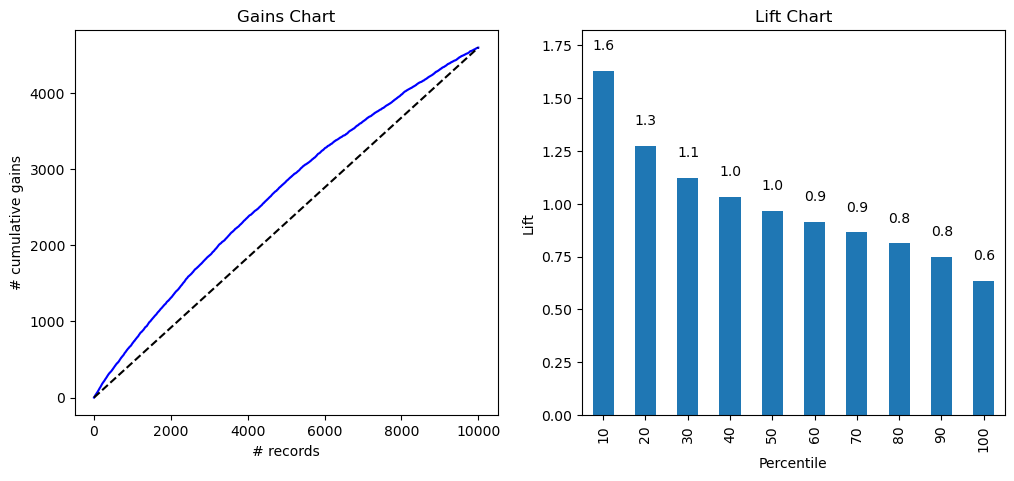

In [35]:
import matplotlib.pyplot as plt
from dmba import gainsChart, liftChart

# Step 1: Sort results by predicted probability of High Risk (class 1)
hospital_df = log_result.sort_values(by=['p(1)'], ascending=False)

# Step 2: Set up side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Step 3: Plot Gains Chart
gainsChart(hospital_df['Actual'], ax=axes[0], color='Blue')
axes[0].set_title('Gains Chart')

# Step 4: Plot Lift Chart (decile-wise)
liftChart(hospital_df['p(1)'], title=False, ax=axes[1])
axes[1].set_title('Lift Chart')

# Step 5: Display charts
#plt.tight_layout()
plt.show()

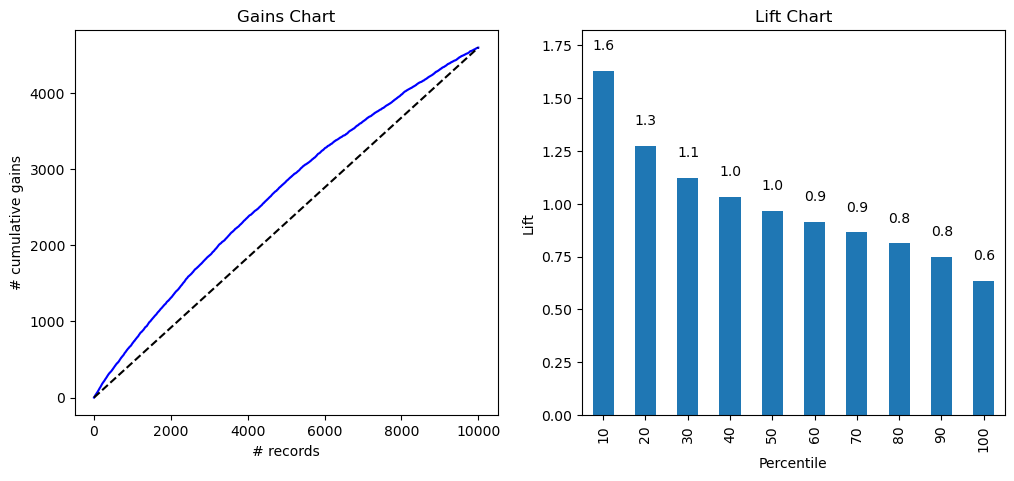

In [36]:
import matplotlib.pyplot as plt
from dmba import gainsChart, liftChart

# Step 1: Sort results by predicted probability of High Risk (class 1)
b2_hospital_df = log_result.sort_values(by=['p(1)'], ascending=False)

# Step 2: Set up side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Step 3: Plot Gains Chart
gainsChart(b2_hospital_df['Actual'], ax=axes[0], color='Blue')
axes[0].set_title('Gains Chart')

# Step 4: Plot Lift Chart (decile-wise)
liftChart(b2_hospital_df['p(1)'], title=False, ax=axes[1])
axes[1].set_title('Lift Chart')

# Step 5: Display charts
#plt.tight_layout()
plt.show()